# Project 9: Partial Correlations and Directed Acyclic Graphs


## Chains

Text(0.5, 1.0, 'Chain')

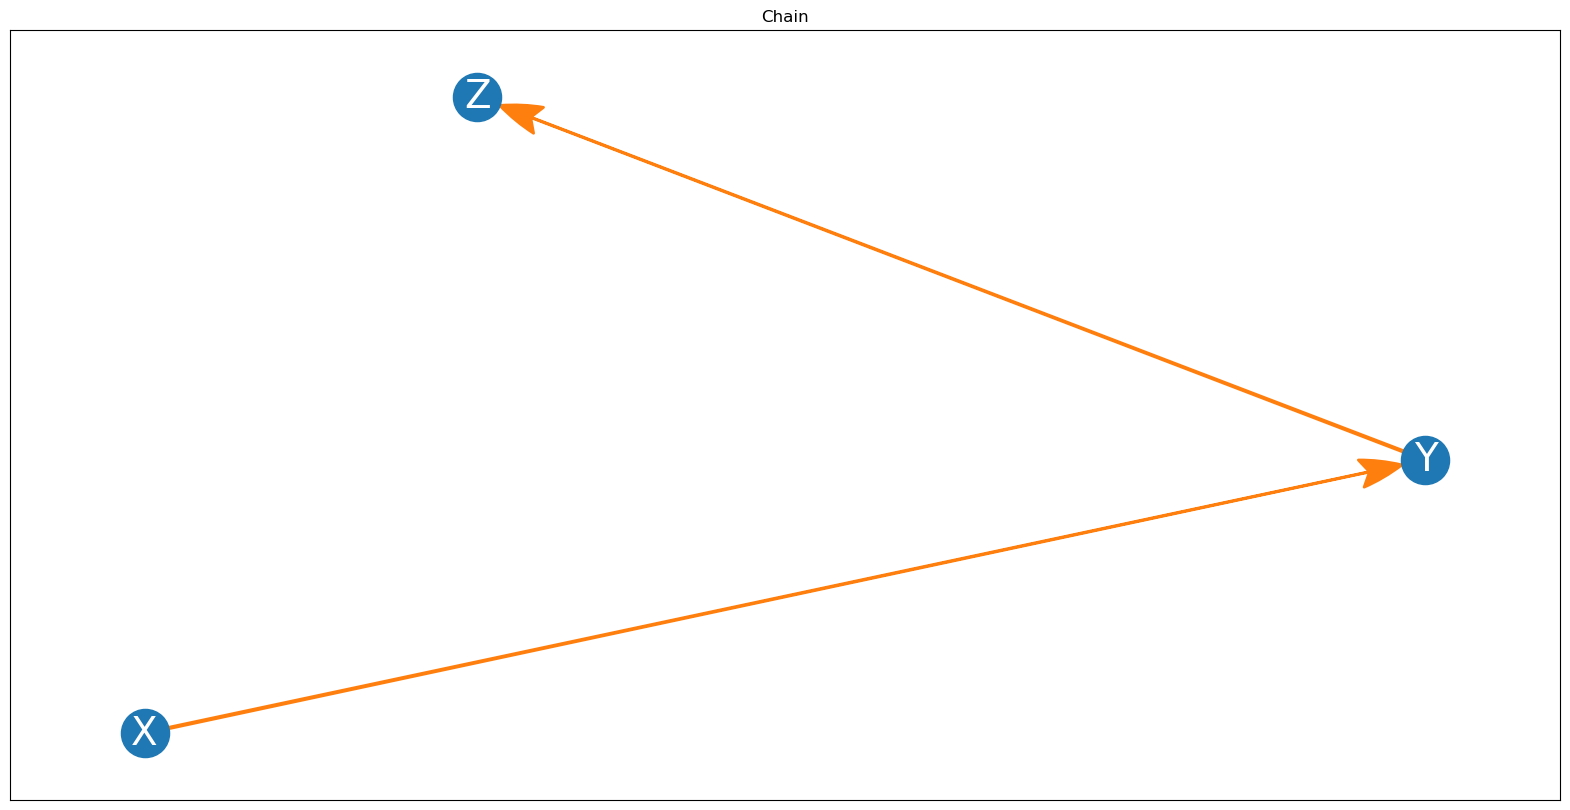

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle

# initiate graph object
G = nx.DiGraph()
G.add_edges_from([("X", "Y"), ("Y", "Z")])
pos = nx.spring_layout(G)
arrow_style = ArrowStyle("Fancy, head_length=3, head_width=2, tail_width=.1")
# graph
fig, ax = plt.subplots(figsize = (20,10))
nx.draw_networkx(G, pos, node_size = 1200,
                with_labels = True, arrows = True,
                font_color = "white",
                font_size = 28, alpha = 1,
                width = 2, edge_color = "C1",
                arrowstyle = arrow_style,
                ax = ax)
ax.set_title("Chain")

In [2]:
# import random
import numpy as np
import pandas as pd

length = 100000
cols = ["X", "Y", "Z"]
chain = {col:[] for col in cols}
for i in range(length):
    chain["X"].append(np.random.normal(0,1))
    chain["Y"].append(chain["X"][-1] * -1 + np.random.normal(0,2))
    chain["Z"].append(chain["Y"][-1] * .5 + np.random.normal(0,1))

chain = pd.DataFrame(chain)
chain.tail()

X         Y         Z
99995  1.279107 -2.922064  0.395346
99996  0.503258 -0.323241  0.757450
99997 -1.788706  3.154105  1.383825
99998 -0.675836  0.740223 -1.054432
99999  2.040346 -3.265354 -3.248321

In [3]:
chain.corr()

X         Y         Z
X  1.000000 -0.447522 -0.331620
Y -0.447522  1.000000  0.741608
Z -0.331620  0.741608  1.000000

C:\Users\JLCat\githubrepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:145: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(data, c = c, alpha = alpha, s = 200 / num_vars, ax=ax)


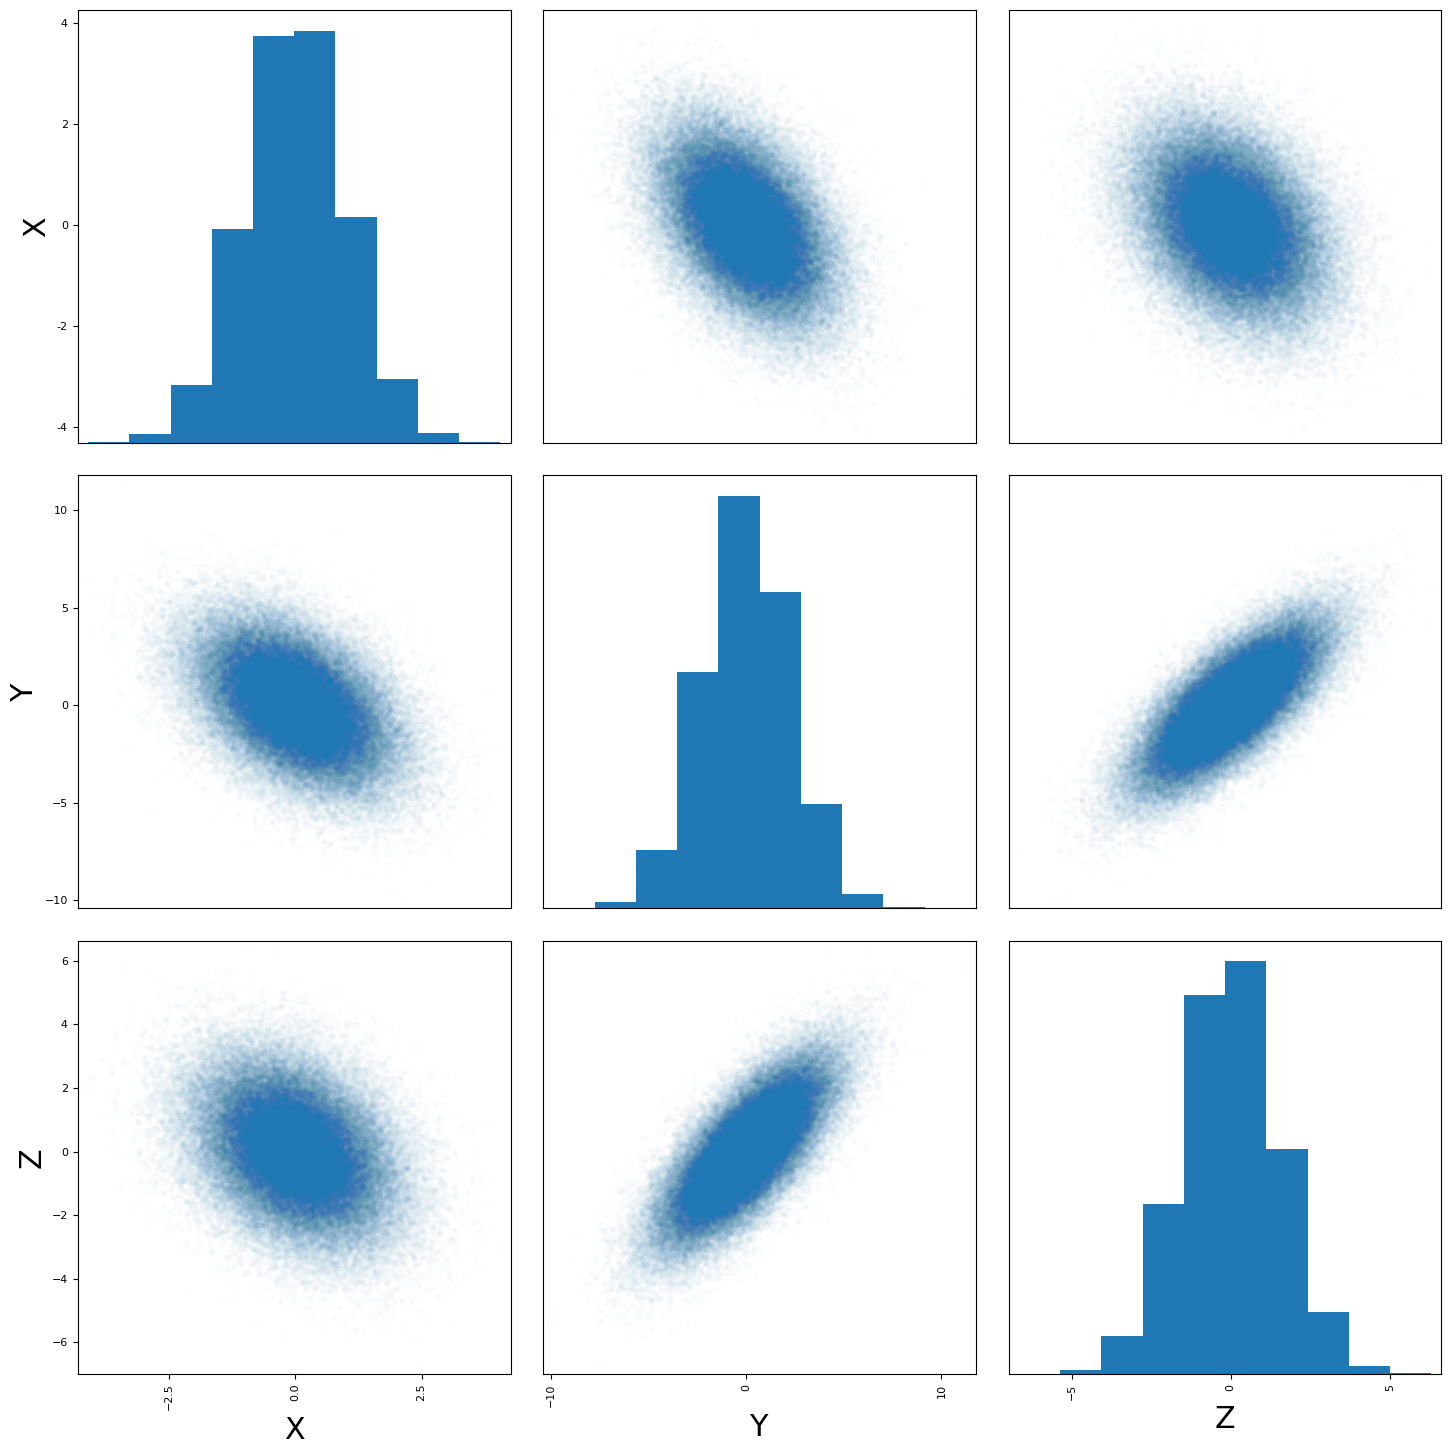

In [4]:
plt.rcParams.update({"font.size":30})
from datlib.plots import *
formatted_scatter_matrix(chain, alpha = 0.015)

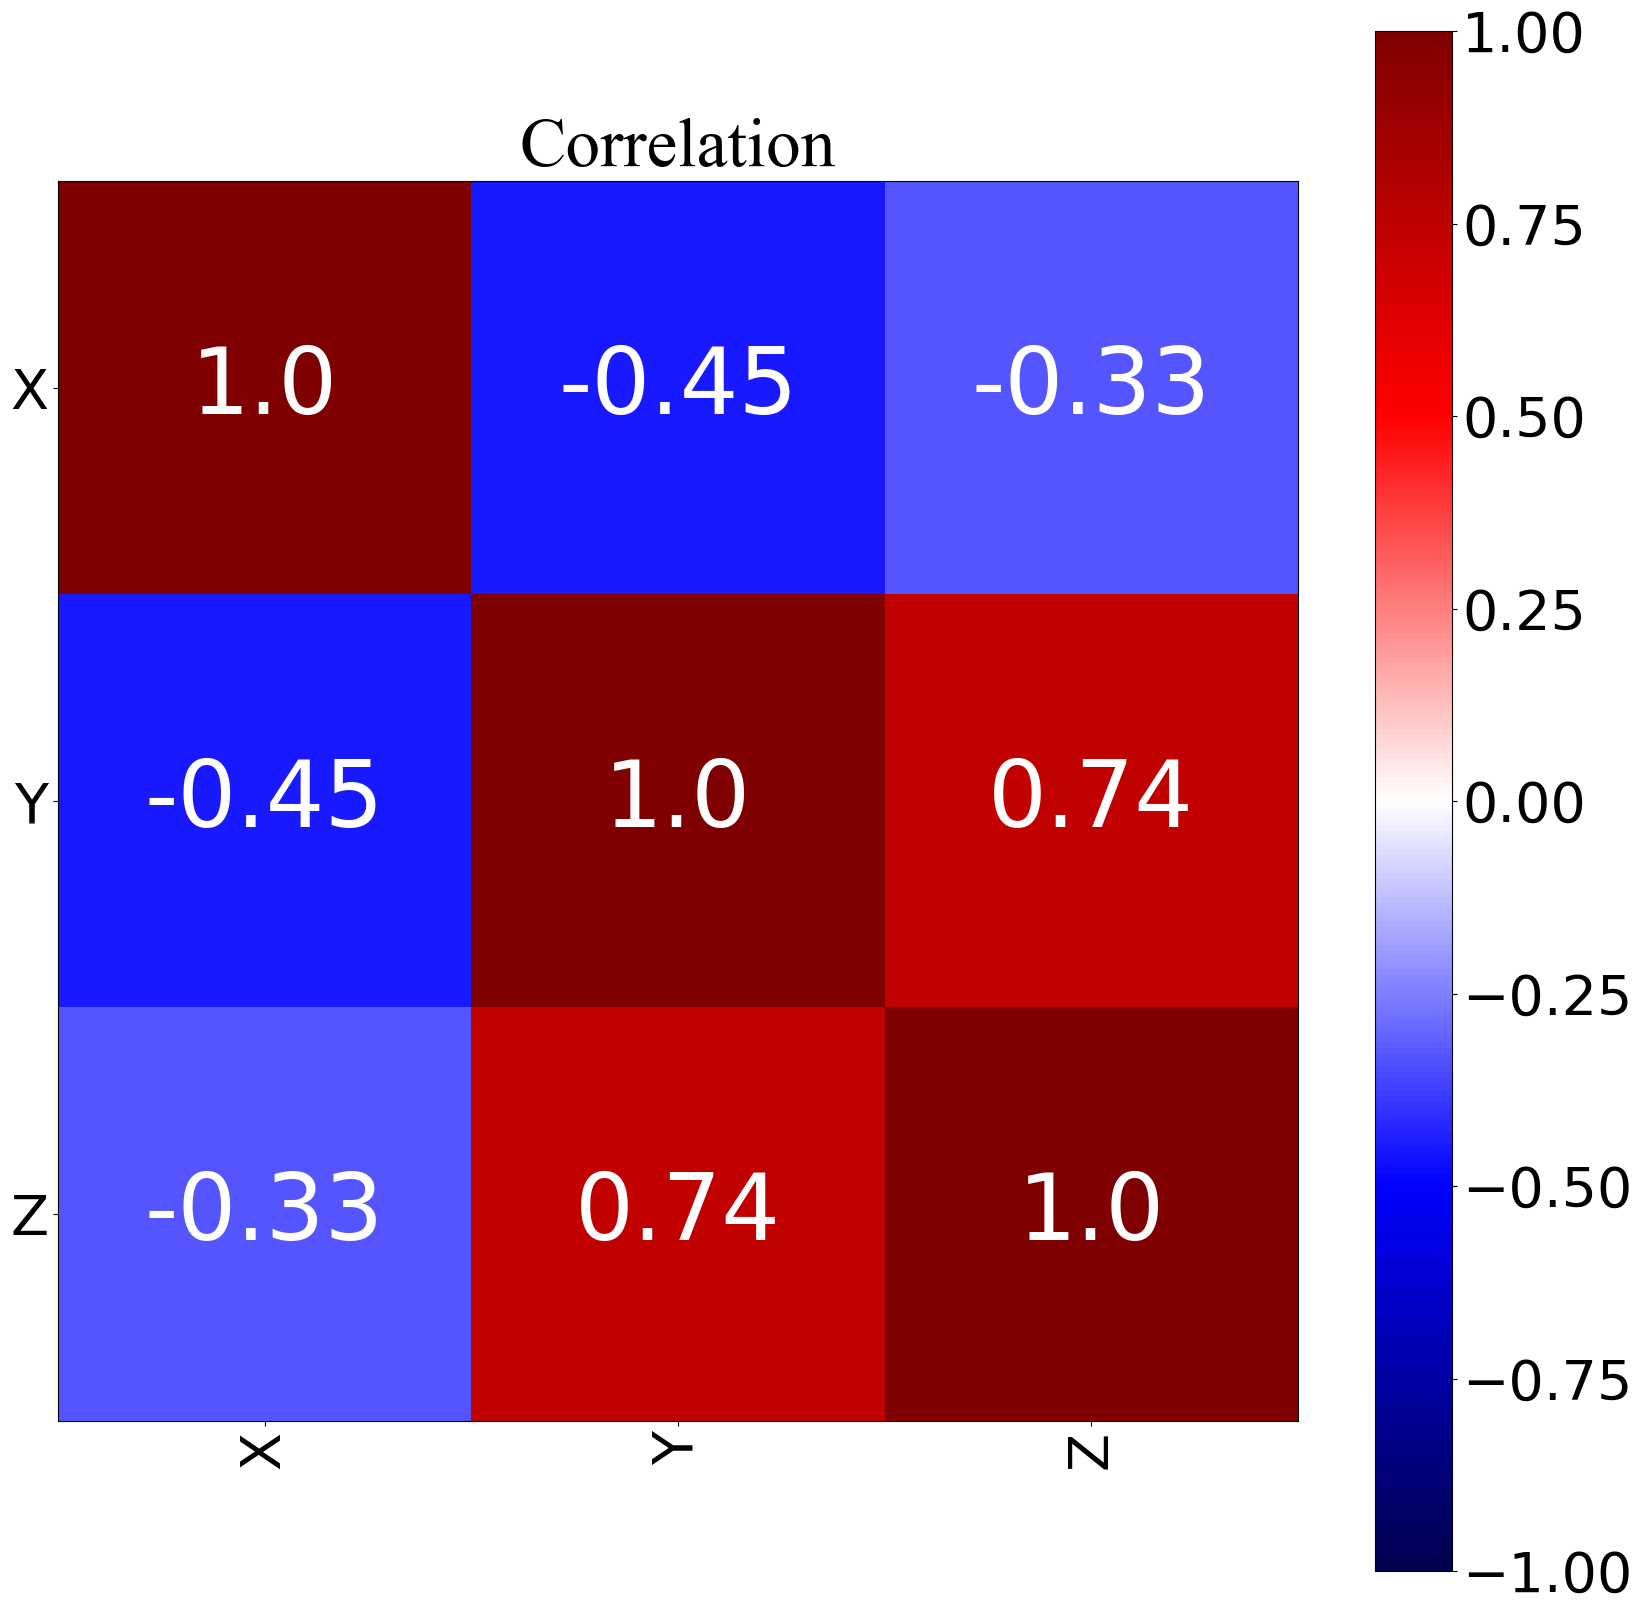

In [5]:
corr_matrix_heatmap(chain.corr(),
                    save_fig = False,
                    pp = None,
                    title = "Correlation")

If we control for $Y$, however, we see that that there is no longer any correlation between $X$ and $Z$. This is called a partial correlation. In the following matrix, partial correlations of each pair are calculated using the remaing variable as a control. We can interpret the result as:

$X \!\perp\!\!\!\perp Z|Y$ 

$Corr(X,Z|Y)\approx 0.00$

First, let's substantiate this intuition using an OLS regression. We run the regression for:

$X = \beta_0 + \beta_Y + \beta_Z + \epsilon_X$

In [6]:
import statsmodels.api as sm

Xc = chain[["X"]]
Xc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, Xc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_2340\3806329196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:05:58   Log-Likelihood:            -1.7649e+05
No. Observations:              100000   AIC:                         3.530e+05
Df Residuals:                   99998   BIC:                         3.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.4973      0.004   -111.156      0.000      -0.506      -0.489
Constant      -0.0006      0.004     -0.130      0.897      -0.009       0.008
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.568
Skew:                           0.018   Prob(JB):                       0.0138
Kurtosis:                       2.973   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:

XYc = chain[["Y", "X"]]
XYc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, XYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 6.111e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:05:58   Log-Likelihood:            -1.4239e+05
No. Observations:              100000   AIC:                         2.848e+05
Df Residuals:                   99997   BIC:                         2.848e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y              0.4984      0.002    312.688      0.000       0.495       0.502
X              0.0005      0.004      0.140      0.888      -0.006       0.007
Constant       0.0013      0.003      0.417      0.677      -0.005       0.008
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.785
Skew:                           0.001   Prob(JB):                        0.410
Kurtosis:                       3.021   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
residuals = {}
def get_residuals(df):
    for y_var in df.keys():
        # save all vars in list of X_vars
        X_vars = list(df.keys())
        ## then remove y_var from X_vars
        X_vars.remove(y_var)
        # save X matrix
        X = df[X_vars]
        # add a constant to the X matrix
        X["Constant"] = 1
        # save y matrix (vector)
        y = df[[y_var]]
        model = sm.OLS(y, X)
        results = model.fit()
        ## save error term identified with each regression
        ## name references the explained variable
        residuals["$\\epsilon_{" + y_var + "}$"] = results.resid
    return pd.DataFrame(residuals)
residuals = get_residuals(chain)
residuals

$\epsilon_{X}$  $\epsilon_{Y}$  $\epsilon_{Z}$
0           -0.454751        1.695238       -1.001337
1           -0.383689        0.487834       -0.806721
2            0.056770        0.719452       -0.609419
3           -0.137733       -0.229494       -0.228160
4           -0.429666       -1.550803        1.158368
...               ...             ...             ...
99995        0.694504       -2.664352        1.849799
99996        0.440127       -0.816898        0.916983
99997       -1.154139        0.880539       -0.188679
99998       -0.524802        1.447712       -1.424363
99999        1.388278        0.991295       -1.623146

[100000 rows x 3 columns]

In [9]:
residuals.corr()

$\epsilon_{X}$  $\epsilon_{Y}$  $\epsilon_{Z}$
$\epsilon_{X}$        1.000000        0.318531       -0.000444
$\epsilon_{Y}$        0.318531        1.000000       -0.703121
$\epsilon_{Z}$       -0.000444       -0.703121        1.000000

In [10]:
def calculate_partial_corr(residuals):
    pcorr = residuals.corr() * -1
    for x in residuals.keys():
        for y in residuals.keys():
            if x == y:
                pcorr[y][x] = 1
    return pcorr
chain_pcorr = calculate_partial_corr(residuals)
chain_pcorr.rename(columns = {r:r[-3] for r in residuals.keys()}, 
                   index = {r:r[-3] for r in residuals.keys()},
                   inplace = True)
chain_pcorr

X         Y         Z
X  1.000000 -0.318531  0.000444
Y -0.318531  1.000000  0.703121
Z  0.000444  0.703121  1.000000

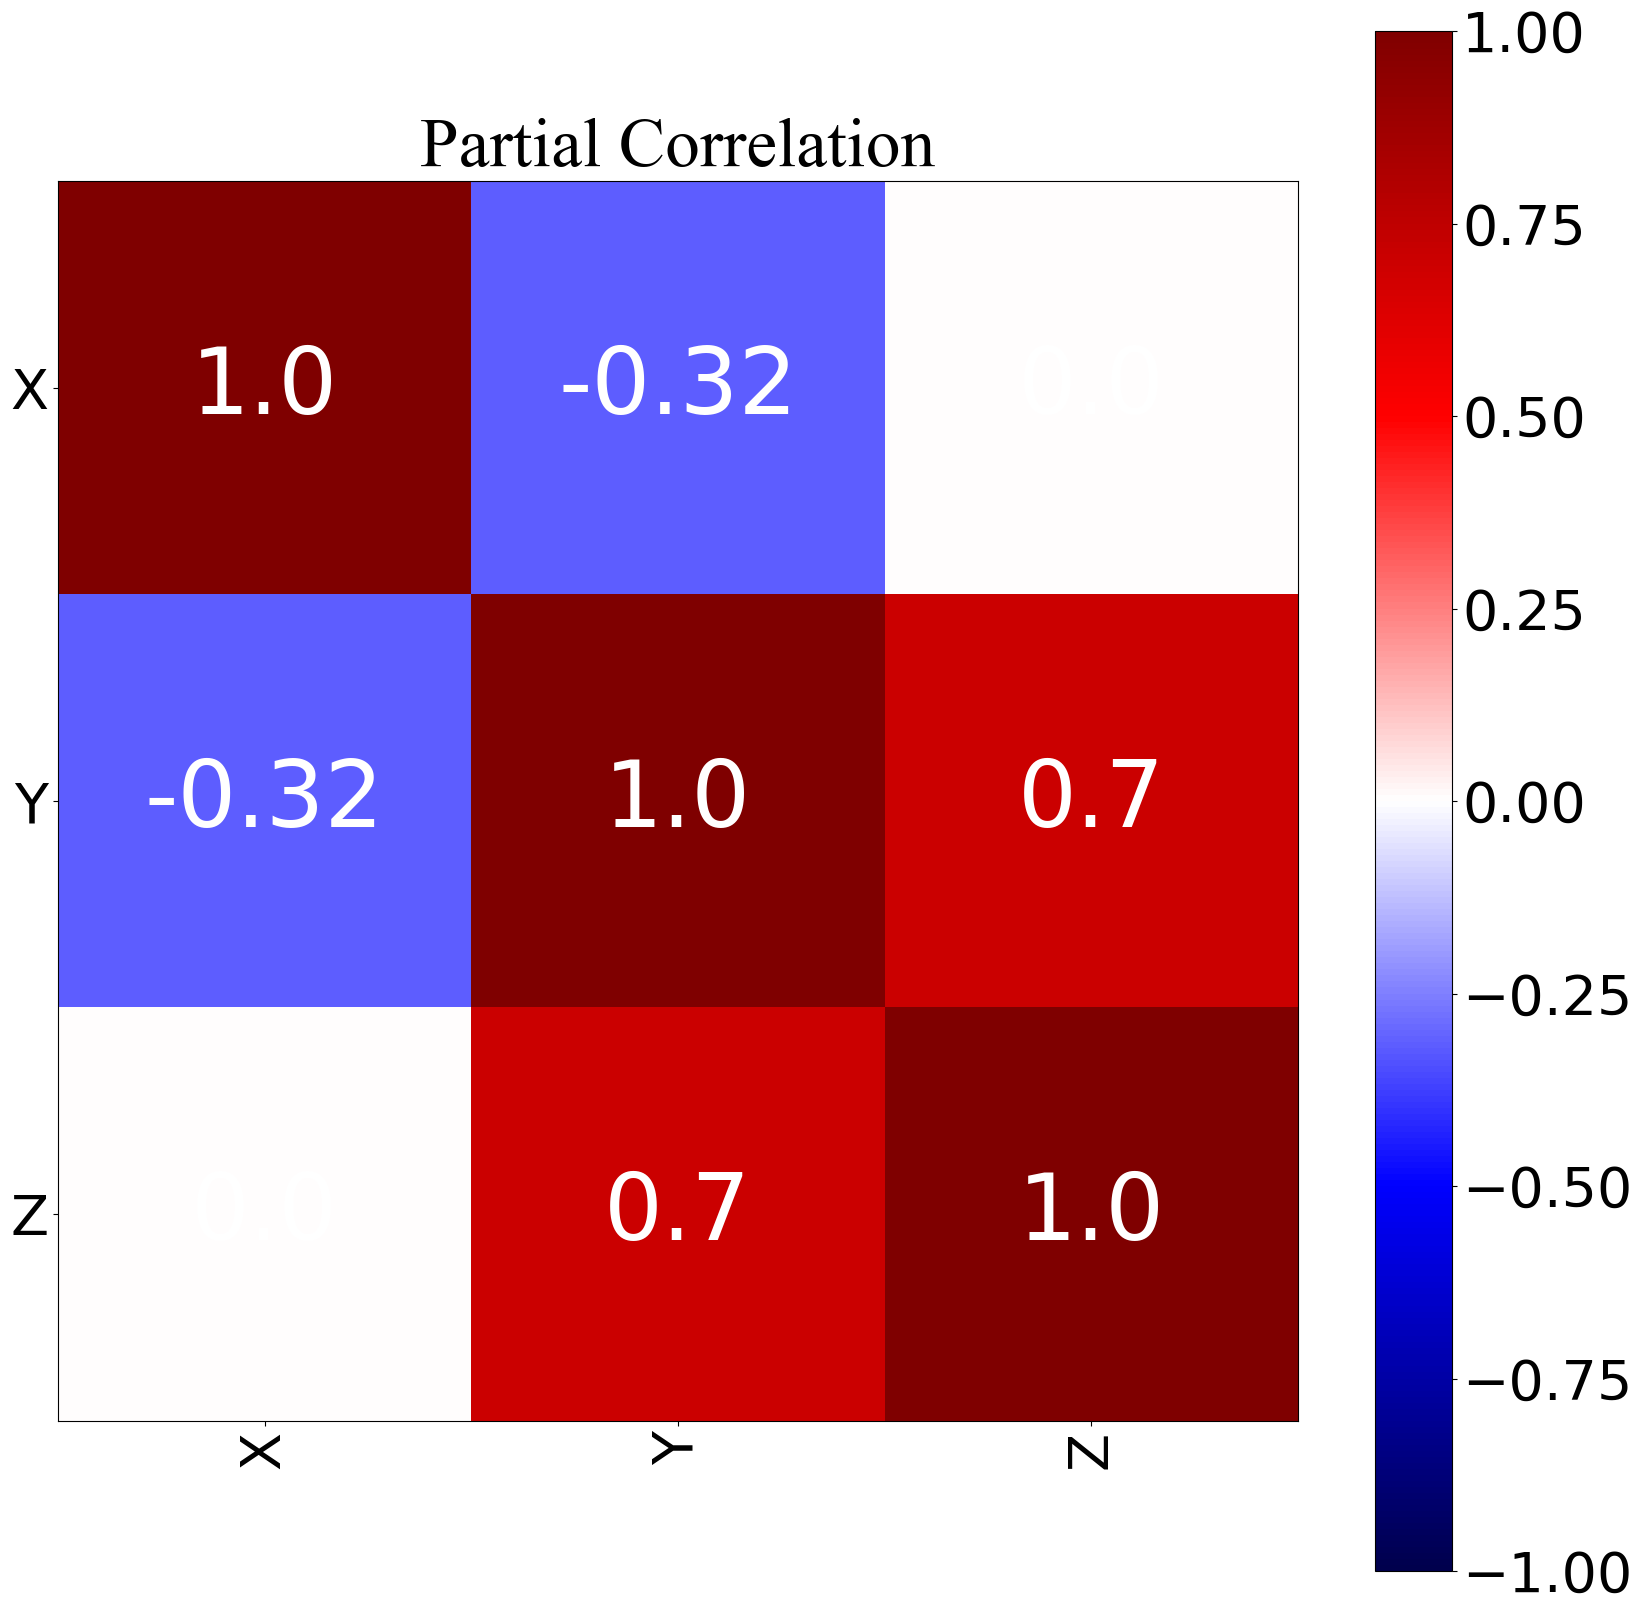

In [11]:
corr_matrix_heatmap(chain_pcorr,
                    save_fig = False,
                    pp = None,
                    title = "Partial Correlation")

In [12]:
# !pip install pingouin
import pingouin
chain.pcorr().round(3)


X      Y      Z
X  1.000 -0.319  0.000
Y -0.319  1.000  0.703
Z  0.000  0.703  1.000

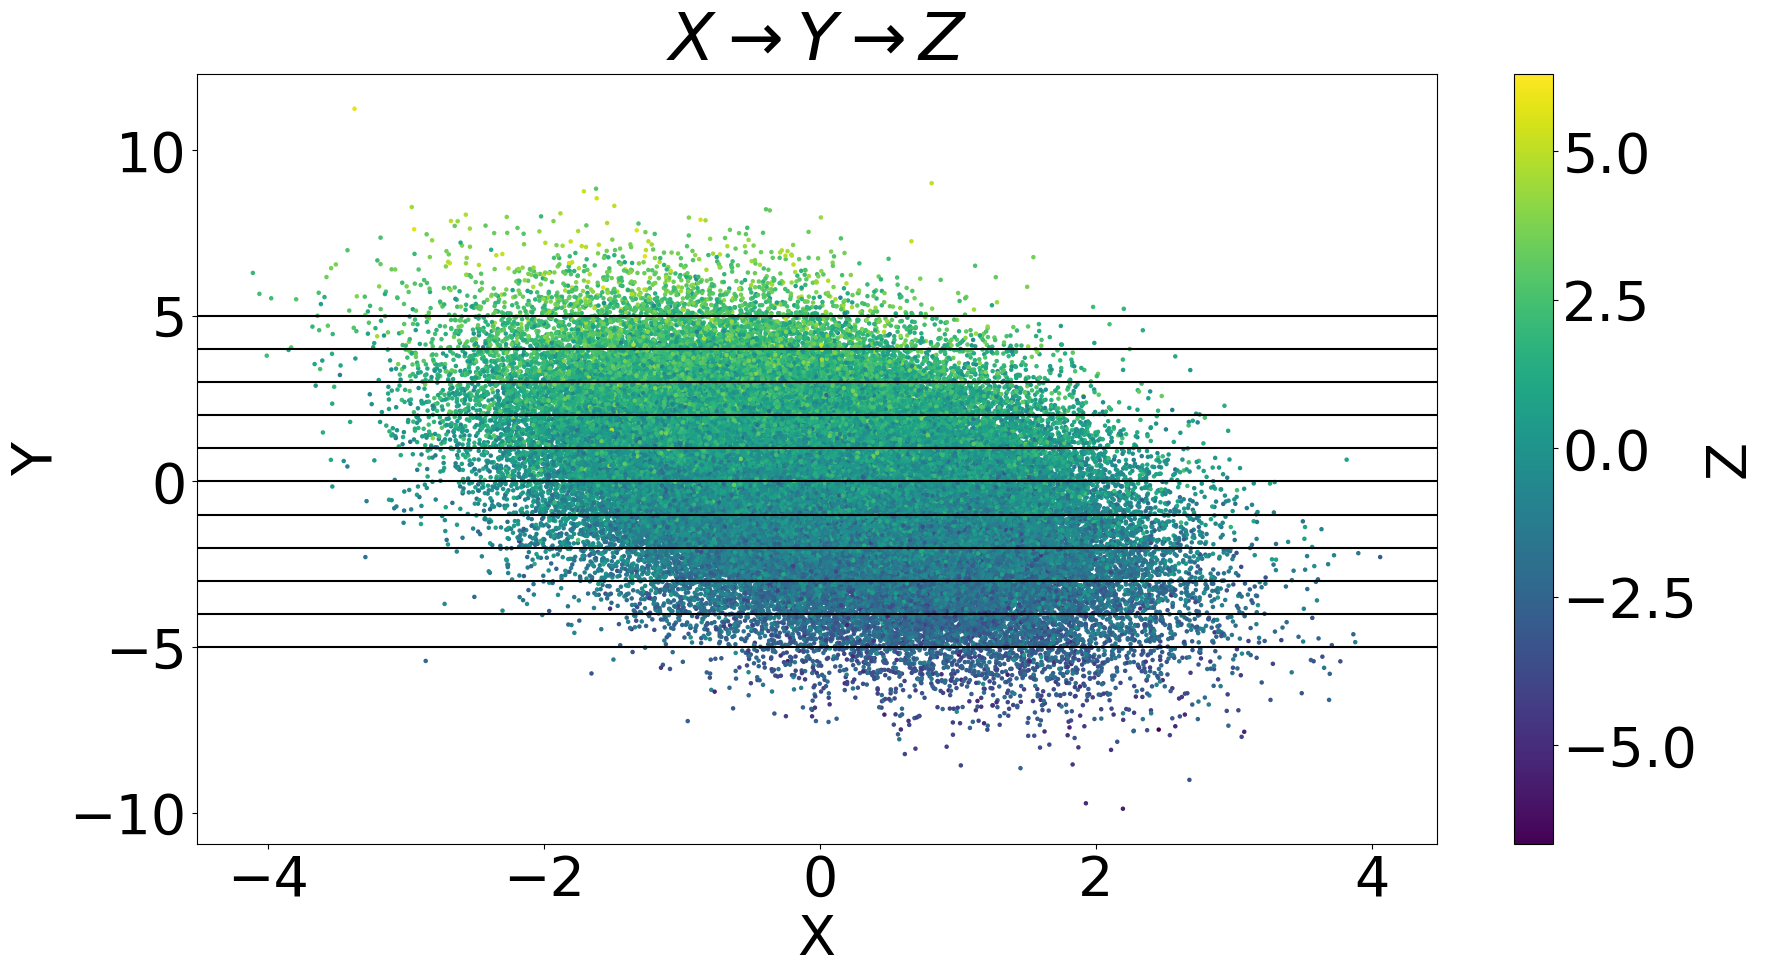

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
chain.plot.scatter(x = "X", y = "Y", c = "Z", cmap = "viridis", s = 5, ax = ax)
ax.set_title("$X \\rightarrow Y \\rightarrow Z$")
for i in range(-5, 6): ax.axhline(i, c = "k")

## Forks

 $Y\leftarrow X \rightarrow Z$

In [14]:
G = nx.DiGraph()
G.add_edges_from([("X", "Y"), ("X", "Z")])
pos = nx.spring_layout(G)

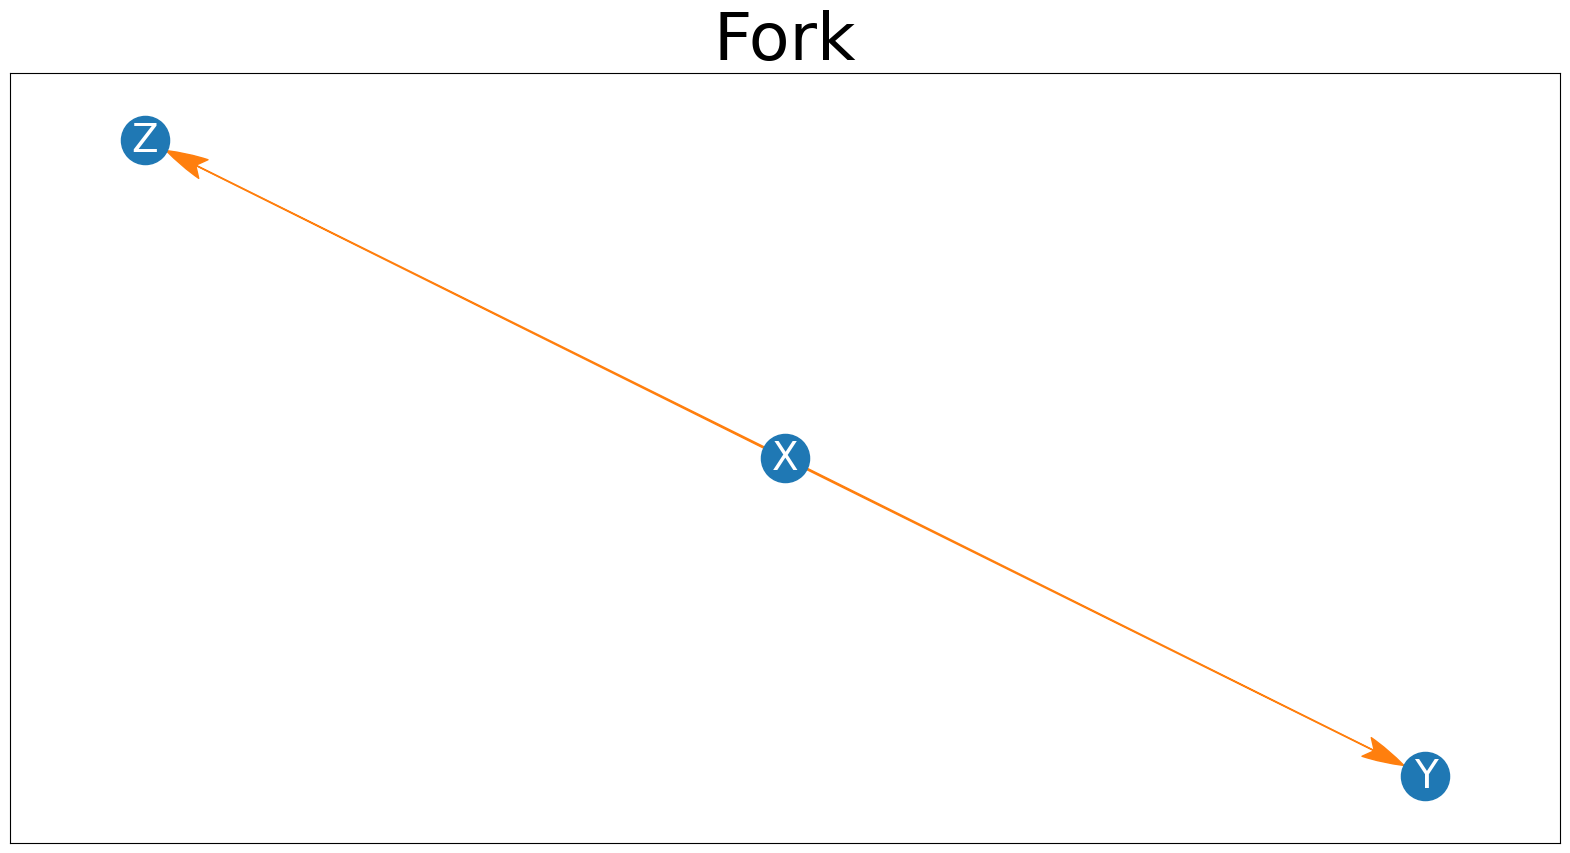

In [15]:
def plot_network(G, pos, title ="", node_size = 1200, 
                 font_color = "white",
                 font_size = 28,
                 alpha = 1, 
                 width = 1, 
                 edge_color = "C1"):
    fig, ax = plt.subplots(figsize = (20,10))
    nx.draw_networkx(G, pos, node_size = node_size,
                     with_labels = True, arrows = True,
                     font_color = font_color,
                     font_size = font_size, alpha = alpha,
                     width = width, edge_color = edge_color,
                     arrowstyle = ArrowStyle(
                         "Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     ax = ax)
    ax.set_title(title)
plot_network(G, pos, "Fork")

### Create a Fork

In [16]:
fork = {col:[] for col in cols}
for i in range(length):
    fork["X"].append(np.random.normal(0,1))
    fork["Y"].append(fork["X"][-1] + np.random.normal(0,1))
    fork["Z"].append(fork
                     ["X"][-1] *2 + np.random.normal(0,1))
fork = pd.DataFrame(fork)
fork

X         Y         Z
0     -0.037368  0.706674 -2.308527
1     -0.632933  0.734861 -1.301048
2      0.489734 -0.139849 -0.295931
3     -0.559883 -0.112611 -1.221400
4     -0.625951 -0.590880 -1.370473
...         ...       ...       ...
99995  0.925111  1.877984  2.441867
99996  1.749391  1.038287  3.222799
99997 -1.034002 -0.962759 -1.484075
99998 -0.625689 -0.054540 -1.855076
99999 -1.608553 -2.044517 -3.320815

[100000 rows x 3 columns]

In [17]:
fork.corr()

X         Y         Z
X  1.000000  0.705343  0.893580
Y  0.705343  1.000000  0.628541
Z  0.893580  0.628541  1.000000

In [18]:
XZc = fork[["X", "Z"]]
XZc["Constant"] = 1
Y = fork[["Y"]]
# pass y_var as list for consistent structure
model = sm.OLS(Y, XZc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                 4.951e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:06:09   Log-Likelihood:            -1.4182e+05
No. Observations:              100000   AIC:                         2.837e+05
Df Residuals:                   99997   BIC:                         2.837e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.0079      0.007    142.795      0.000       0.994       1.022
Z             -0.0055      0.003     -1.728      0.084      -0.012       0.001
Constant      -0.0037      0.003     -1.184      0.236      -0.010       0.002
==============================================================================
Omnibus:                        0.434   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.435
Skew:                           0.005   Prob(JB):                        0.805
Kurtosis:                       2.999   Cond. No.                         5.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
fork.pcorr()

X         Y         Z
X  1.000000  0.411550  0.816634
Y  0.411550  1.000000 -0.005466
Z  0.816634 -0.005466  1.000000

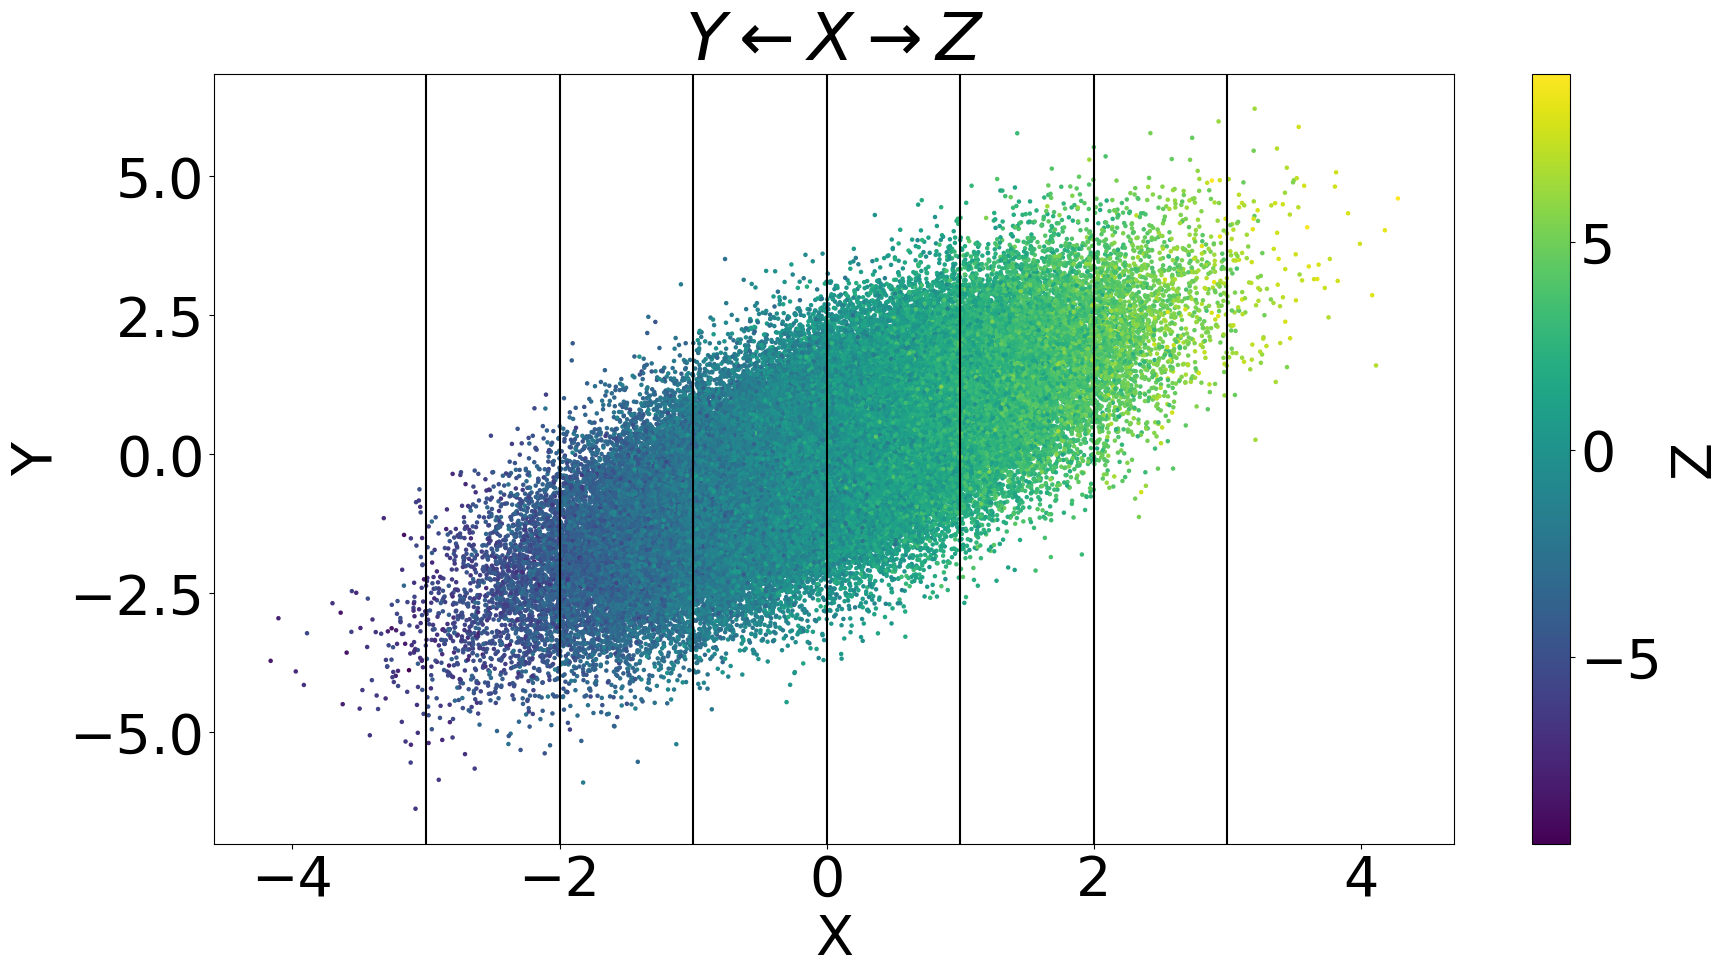

In [20]:
fig, ax = plt.subplots(figsize = (20,10))
fork.plot.scatter(x = "X", y = "Y", c = "Z",
                  s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\leftarrow X \\rightarrow Z$")
for i in range(-3,4): ax.axvline(i, c="k")

## Colliders

$$Y \rightarrow X \leftarrow Z$$

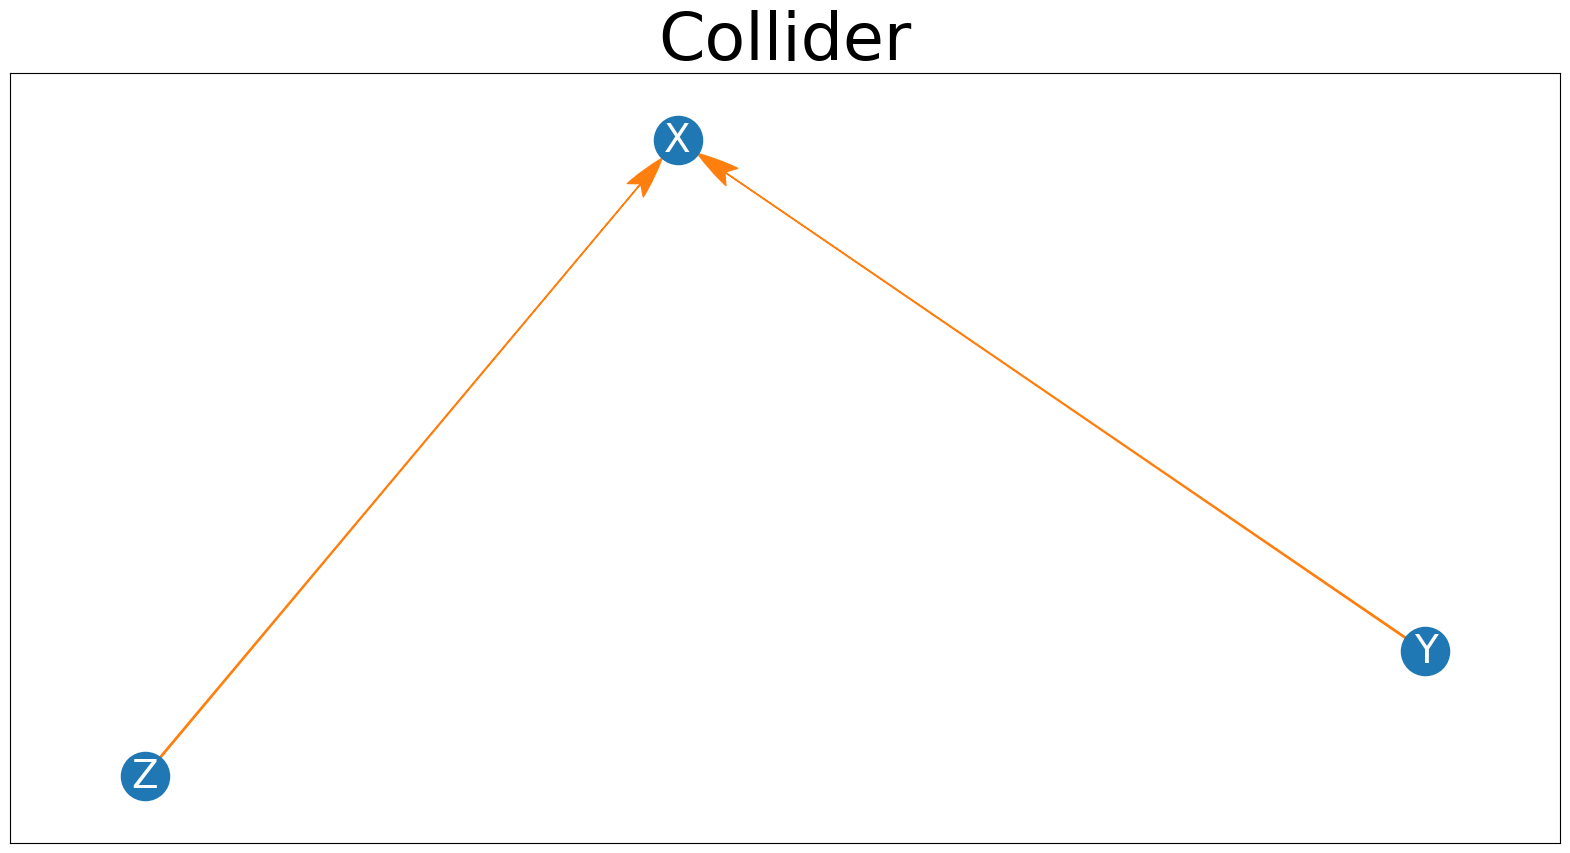

In [32]:
G = nx.DiGraph()
G.add_edges_from([("Y", "X"), ("Z", "X")])
pos = nx.spring_layout(G)
plot_network(G, pos, "Collider")

In [22]:
collider = {col:[] for col in cols}
for i in range(length):
    collider["Y"].append(np.random.normal(0,1))
    collider["Z"].append(np.random.normal(0,1))
    collider["X"].append(collider["Y"][-1] * -.5 + collider["Z"][-1] * .5 + np.random.normal(0,1))
collider = pd.DataFrame(collider)
collider

X         Y         Z
0     -0.373334 -0.154924  0.047032
1     -1.014188  1.624695  0.071416
2      0.523816 -1.127235  0.752923
3     -0.828626 -0.576988 -0.488520
4     -0.590185 -0.193359  0.092845
...         ...       ...       ...
99995 -0.002971 -0.082926  0.122432
99996  0.258812  0.434155 -0.371410
99997 -0.254982 -0.361926 -0.447161
99998  0.108202  0.077176  1.169512
99999 -1.288328 -0.321470 -0.543428

[100000 rows x 3 columns]

In [23]:
collider.corr()

X         Y         Z
X  1.000000 -0.406241  0.409636
Y -0.406241  1.000000 -0.000556
Z  0.409636 -0.000556  1.000000

In [24]:
YZc = collider[["Y", "Z"]]
YZc["Constant"] = 1
X = collider[["X"]]
model = sm.OLS(X, YZc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                 2.492e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:06:19   Log-Likelihood:            -1.4196e+05
No. Observations:              100000   AIC:                         2.839e+05
Df Residuals:                   99997   BIC:                         2.839e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y             -0.4997      0.003   -157.165      0.000      -0.506      -0.493
Z              0.5020      0.003    158.480      0.000       0.496       0.508
Constant      -0.0005      0.003     -0.160      0.873      -0.007       0.006
==============================================================================
Omnibus:                        0.205   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.211
Skew:                           0.003   Prob(JB):                        0.900
Kurtosis:                       2.996   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
collider.pcorr()

X         Y         Z
X  1.000000 -0.445069  0.448047
Y -0.445069  1.000000  0.198967
Z  0.448047  0.198967  1.000000

Text(0.5, 1.0, '$Y \\rightarrow X \\leftarrow Z$')

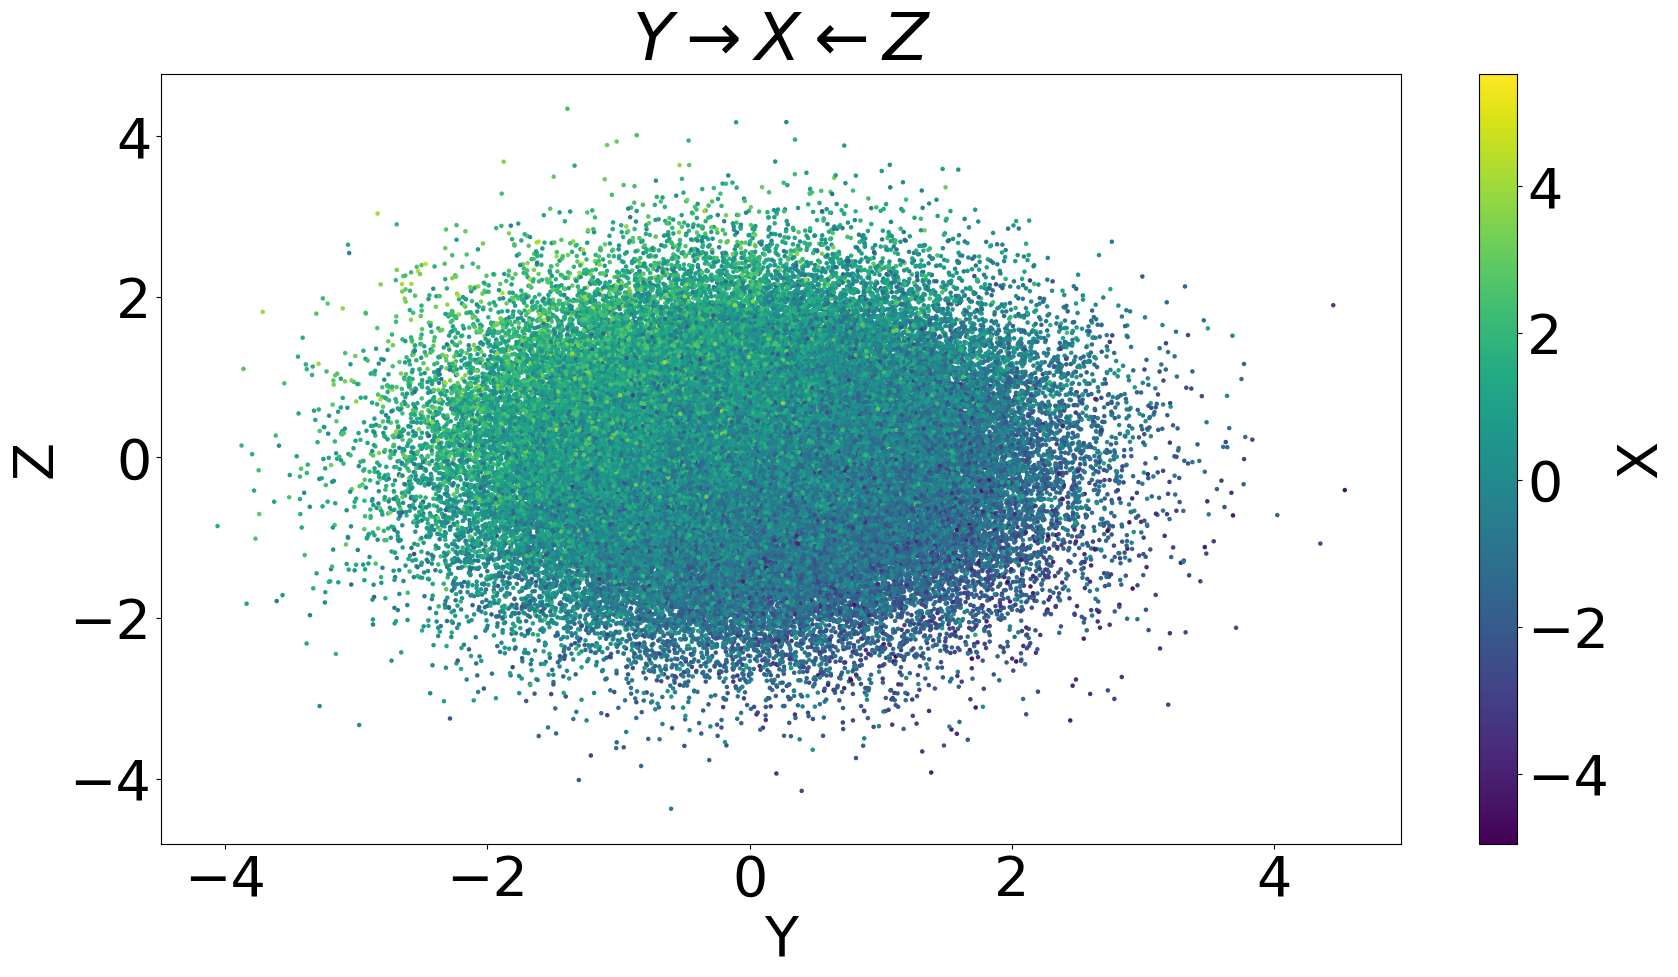

In [26]:
fig,ax = plt.subplots(figsize = (20,10))
collider.plot.scatter(x = "Y", y = "Z", c = "X",s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\rightarrow X \\leftarrow Z$")

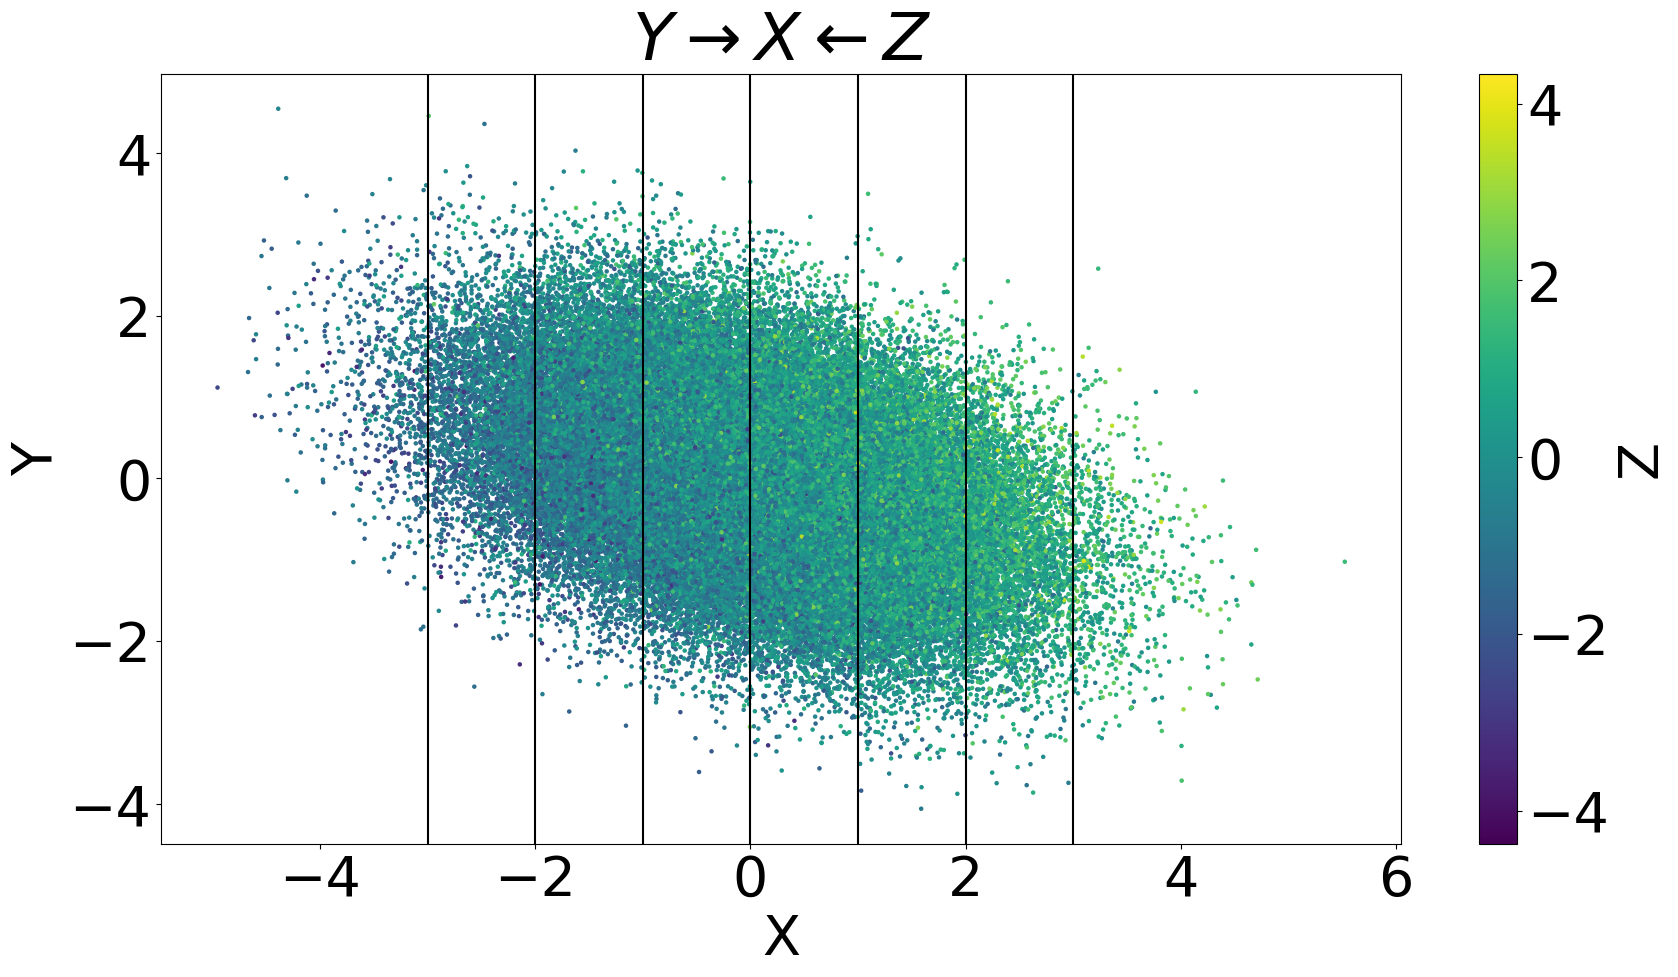

In [27]:
fig,ax = plt.subplots(figsize = (20,10))
collider.plot.scatter(x = "X", y = "Y", c = "Z",s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\rightarrow X \\leftarrow Z$")
for i in range(-3,4): ax.axvline(i, c = "k")

## Problems with Confounding

### Backdoor

In [28]:
G = nx.DiGraph()
G.add_edges_from([("Q", "X"), ("Q", "Y"), ("X", "Z"), ("Y","Z")])
pos = nx.spring_layout(G)

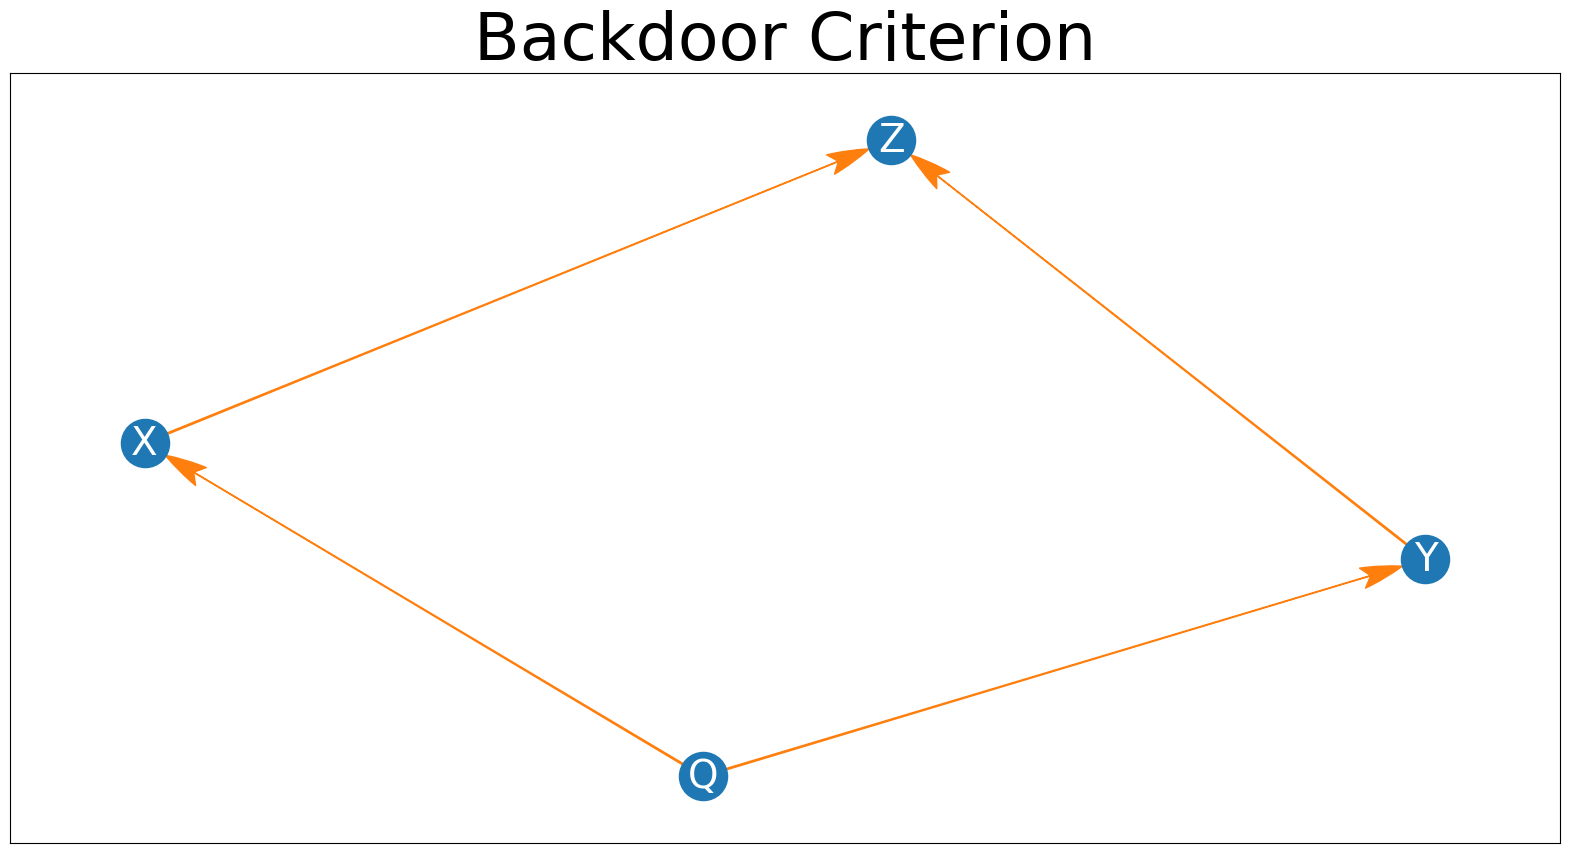

In [29]:
plot_network(G, pos, "Backdoor Criterion")

In [30]:
cols = ["Q", "X", "Y", "Z"]
mu = 0
sigma = 1

backdoor = {col:[] for col in cols}
for i in range(length):
    backdoor["Q"].append(np.random.normal(mu, sigma))
    backdoor["X"].append(3 * backdoor["Q"][-1] + np.random.normal(mu, sigma))
    backdoor["Y"].append(-1 * backdoor["Q"][-1] + np.random.normal(mu, sigma))
    backdoor["Z"].append(1.5 * backdoor["X"][-1] + backdoor["Y"][-1] * -2 + np.random.normal(mu, sigma))
backdoor = pd.DataFrame(backdoor)
backdoor

Q         X         Y         Z
0      1.078235  2.656299 -2.037653  9.472360
1     -0.090969  0.618105  0.562099  0.108251
2      1.649307  4.021612 -0.547186  8.024155
3      0.683491  0.903800 -0.240249  3.094098
4      0.035884  0.983107 -1.031195  2.446870
...         ...       ...       ...       ...
99995 -1.211433 -2.813273  1.109815 -6.511992
99996  0.102380 -0.099905 -0.228925  1.336352
99997 -0.714062 -2.911864  0.816393 -6.139189
99998  0.572755  0.886282 -0.205319 -0.295054
99999  0.378050  1.983478 -1.816810  6.518997

[100000 rows x 4 columns]

In [31]:
QXYc = backdoor[["Q", "X","Y"]]
QXYc["Constant"] = 1
Z = backdoor[["Z"]]
# pass y_var as list for consistentj structure
model = sm.OLS(Z, QXYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.630e+06
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:06:35   Log-Likelihood:            -1.4181e+05
No. Observations:              100000   AIC:                         2.836e+05
Df Residuals:                   99996   BIC:                         2.837e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -0.0110      0.011     -1.041      0.298      -0.032       0.010
X              1.5045      0.003    475.029      0.000       1.498       1.511
Y             -1.9973      0.003   -633.000      0.000      -2.003      -1.991
Constant      -0.0026      0.003     -0.819      0.413      -0.009       0.004
==============================================================================
Omnibus:                        4.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.267
Skew:                          -0.015   Prob(JB):                        0.118
Kurtosis:                       3.010   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Frontdoor Criterion

In [34]:
cols = ["Q", "X", "Y", "Z"]
mu = 0
sigma = 1

frontdoor = {col:[] for col in cols}
for i in range(length):
    frontdoor["Q"].append(np.random.normal(mu, sigma))
    frontdoor["X"].append(10 * frontdoor["Q"][-1] + np.random.normal(mu, sigma))
    frontdoor["Y"].append(frontdoor["X"][-1] * 2 + np.random.normal(mu, sigma))
    frontdoor["Z"].append(frontdoor["Q"][-1] * -1 + frontdoor["Y"][-1] + np.random.normal(mu, sigma))
frontdoor = pd.DataFrame(frontdoor)
frontdoor

Q          X          Y          Z
0     -0.265186  -1.857650  -3.371474  -3.184427
1     -0.690826  -4.965975 -11.077887 -10.614761
2     -1.614197 -16.913402 -33.842885 -32.100455
3     -0.993478  -7.862259 -16.966141 -16.594860
4      0.665678   6.332643  12.347031  11.876104
...         ...        ...        ...        ...
99995  1.491682  14.662557  28.011204  26.972803
99996  1.178719  11.330335  22.699233  21.099219
99997  3.987473  40.130400  79.040343  74.183420
99998 -0.014598   0.586069   0.692332   0.550720
99999 -0.608371  -6.921748 -14.590870 -13.874147

[100000 rows x 4 columns]

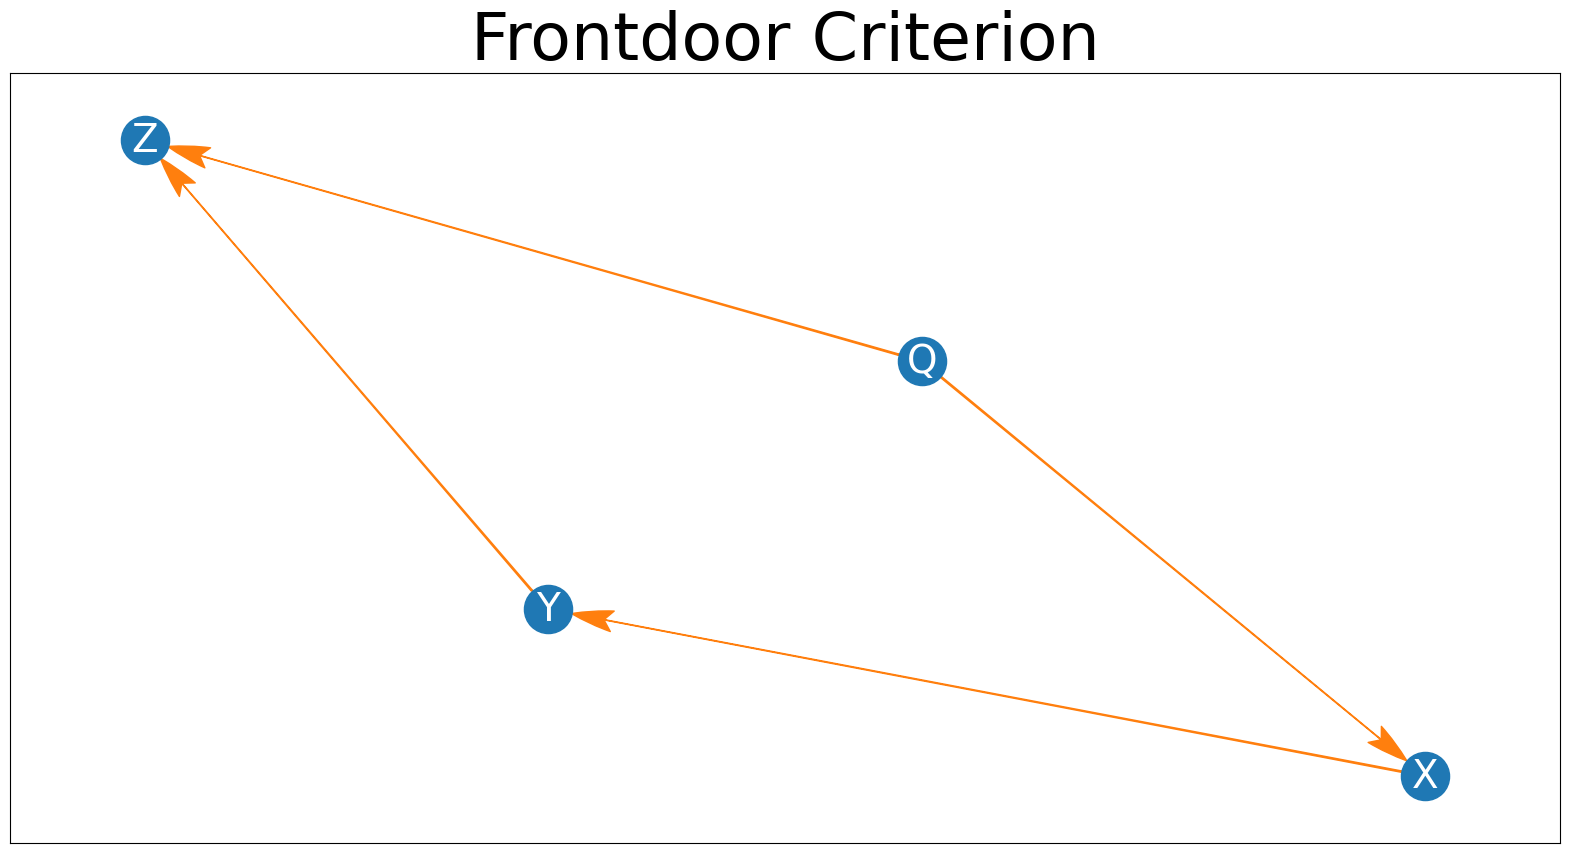

In [35]:
G = nx.DiGraph()
G.add_edges_from([("Q", "X"), ("Q", "Z"), ("X", "Y"), ("Y", "Z")])
pos = nx.spring_layout(G)
plot_network(G, pos, "Frontdoor Criterion")

In [36]:
Xc = frontdoor[["X"]]
Xc["Constant"] = 1
Z = frontdoor[["Z"]]
model = sm.OLS(Z, Xc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_2340\1536465617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.826e+07
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:19:41   Log-Likelihood:            -1.7673e+05
No. Observations:              100000   AIC:                         3.535e+05
Df Residuals:                   99998   BIC:                         3.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.9012      0.000   4273.416      0.000       1.900       1.902
Constant      -0.0054      0.004     -1.197      0.231      -0.014       0.003
==============================================================================
Omnibus:                        2.436   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.422
Skew:                          -0.005   Prob(JB):                        0.298
Kurtosis:                       2.978   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
XYc = frontdoor[["X", "Y"]]
XYc["Constant"] = 1
Z = frontdoor[["Z"]]
model = sm.OLS(Z, XYc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_2340\3814303157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.816e+07
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:23:50   Log-Likelihood:            -1.4248e+05
No. Observations:              100000   AIC:                         2.850e+05
Df Residuals:                   99997   BIC:                         2.850e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.0931      0.006    -14.623      0.000      -0.106      -0.081
Y              0.9971      0.003    313.641      0.000       0.991       1.003
Constant      -0.0025      0.003     -0.790      0.430      -0.009       0.004
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.276
Skew:                           0.003   Prob(JB):                        0.871
Kurtosis:                       3.006   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
QXc = frontdoor[["Q", "X"]]
QXc["Constant"] = 1
Z = frontdoor[["Z"]]
model = sm.OLS(Z, QXc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_2340\2209165990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QXc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.177e+06
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:30:36   Log-Likelihood:            -1.7648e+05
No. Observations:              100000   AIC:                         3.530e+05
Df Residuals:                   99997   BIC:                         3.530e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -1.0027      0.045    -22.299      0.000      -1.091      -0.915
X              2.0005      0.004    446.971      0.000       1.992       2.009
Constant      -0.0054      0.004     -1.205      0.228      -0.014       0.003
==============================================================================
Omnibus:                        2.853   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.836
Skew:                          -0.006   Prob(JB):                        0.242
Kurtosis:                       2.977   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
QXYc = frontdoor[["Q","X","Y"]]
QXYc["Constant"] = 1
Z = frontdoor[["Z"]]
# pass y_var as list for consistent structure
model = sm.OLS(Z, QXYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.222e+07
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:30:36   Log-Likelihood:            -1.4201e+05
No. Observations:              100000   AIC:                         2.840e+05
Df Residuals:                   99996   BIC:                         2.841e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -0.9851      0.032    -30.928      0.000      -1.048      -0.923
X              0.0048      0.007      0.681      0.496      -0.009       0.019
Y              0.9970      0.003    315.081      0.000       0.991       1.003
Constant      -0.0025      0.003     -0.800      0.423      -0.009       0.004
==============================================================================
Omnibus:                        0.109   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.107
Skew:                           0.002   Prob(JB):                        0.948
Kurtosis:                       3.001   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Generate artificial data to be used to detect a directed acyclic graph

In [52]:
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5

lst_dct = {col: [] for col in cols}
for i in range(length):
    lst_dct["P"].append(np.random.normal(mu, 0.5 * sigma))
    lst_dct["Q"].append(np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1] + np.random.normal(mu, sigma))
    lst_dct["Y"].append(lst_dct["Q"][-1] + np.random.normal(mu, sigma))
    lst_dct["Z"].append(lst_dct["Q"][-1] * -1 + 1.5 * lst_dct["X"][-1] + lst_dct["Y"][-1] * -2 + np.random.normal(mu, sigma))
df = pd.DataFrame(lst_dct)
df

P         Q          X          Y          Z
0      0.158893  4.062453   7.328779   7.850353 -21.781305
1     -2.765734 -5.517385 -15.875196  -2.737393  -6.913224
2      1.321675  4.587277  10.711561   1.885029   6.032693
3     -1.720226  8.921454  37.087482   8.042952  26.602393
4      3.031644 -1.731237  -6.191890   2.038415 -18.538737
...         ...       ...        ...        ...        ...
99995 -3.349369  1.010255  10.900308  -7.638098  31.619595
99996  0.052148  1.431266   6.740555   3.963319   1.205469
99997 -0.458063 -1.310006  -0.603381  -4.922379  10.810533
99998 -0.209229 -1.079516  -6.155478   3.568367 -13.234217
99999  3.407647 -6.976823 -21.487834 -13.749325  -3.998416

[100000 rows x 5 columns]

## Using partial correlations to build a causal skeleton


1. Build a fully connected graph
2. For each variable, test every possible with the remaining variables. If a correlation between, for example, variables $X$ and $Y$ is not statistically significant, remove the link $XY$.
3. For variables whose correlation is statistically significant, test every possible combination of control variables. If the statistical significance of any of the tested partial correlations is broken, remove the link $XY$.
4. If after steps 2 and 3, the link $XY$ remains that link will be included in the skeleton.

### Build Undirected Graph

In [90]:
undirected_graph = {key:[a  for a in cols if a != key] for key in cols}
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [91]:
graph_list = []
for source, sinks in undirected_graph.items():
    for sink in sinks:
        graph_list.append((source, sink))


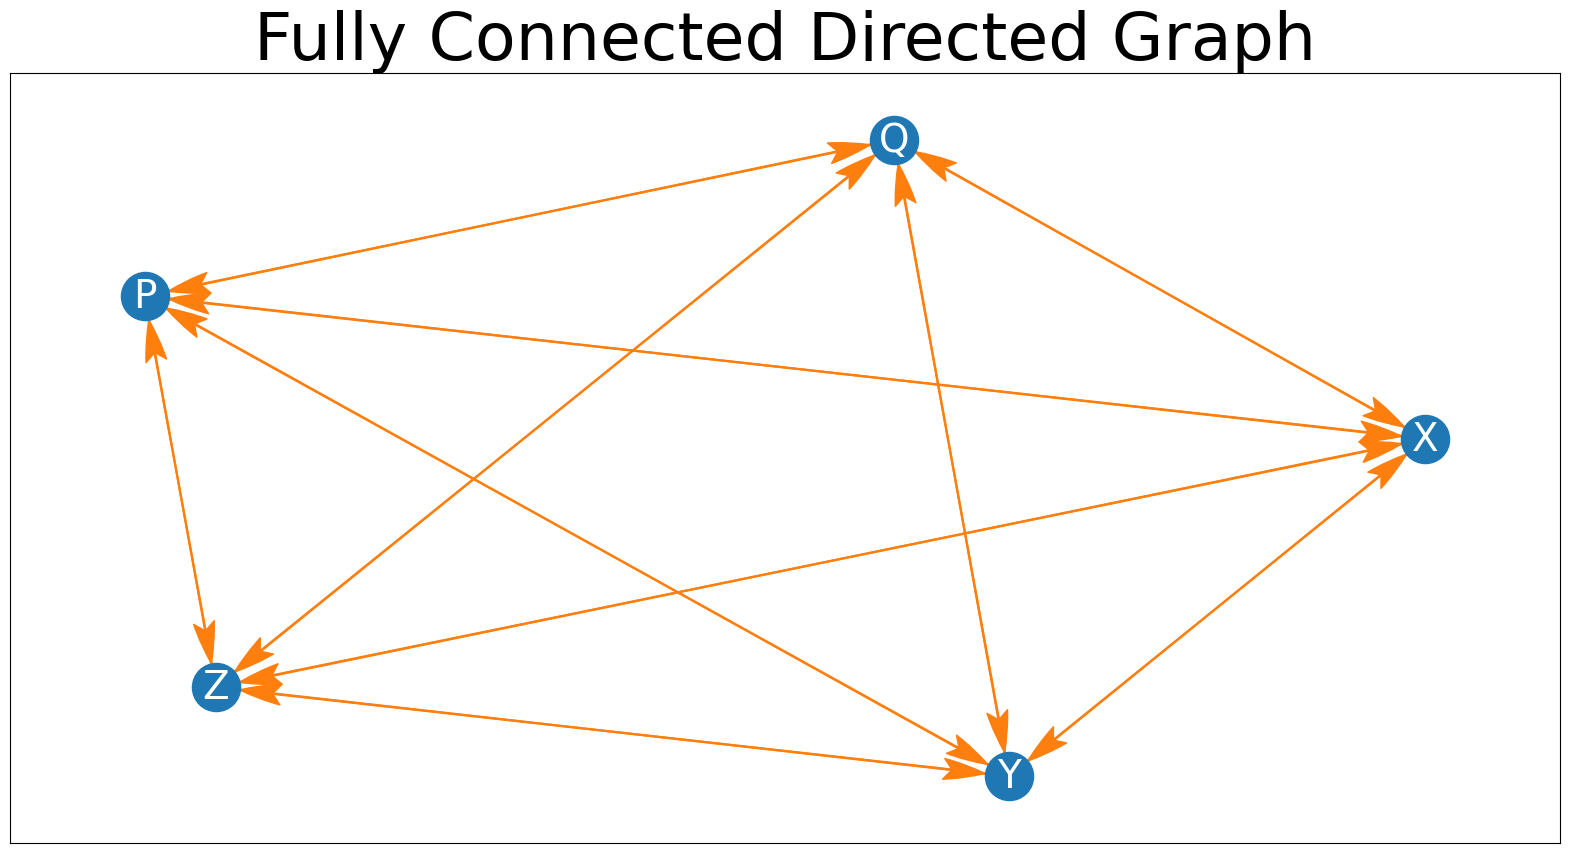

In [92]:
G = nx.DiGraph()
G.add_edges_from(graph_list)
pos = nx.spring_layout(G)
plot_network(G, pos, "Fully Connected Directed Graph")

## Infer Grahical Skeleton from Data

In [93]:
import copy
p_val = 0.05

def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control, undirected_graph, x, y, controls_used):
        for c_var in control_vars:
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                       method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                    break
                    

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                # first check for corelation with no controls
                test = df.partial_corr(x = x,
                                       y = y,
                                       covar = None,
                                       method = "pearson")
                if test["p-val"].values[0] > p_val: 
                    undirected_graph[x].remove(y)

                else:
                    control_vars = [z for z in df.keys() if z !=y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
                    
                
    print(undirected_graph)
build_skeleton(df, undirected_graph)

{'P': [], 'Q': ['X', 'Y', 'Z'], 'X': ['Q', 'Z'], 'Y': ['Q', 'Z'], 'Z': ['Q', 'X', 'Y']}
